In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [2]:
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

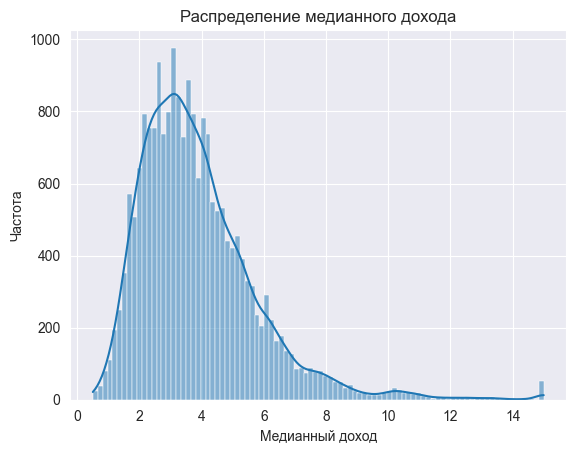

In [7]:
sns.histplot(df['MedInc'], kde=True)  
plt.title('Распределение медианного дохода')
plt.xlabel('Медианный доход')
plt.ylabel('Частота')
plt.show()

In [12]:
import numpy as np
median = np.median(df['MedInc'])
mean = np.mean(df['MedInc'])
diff_medinc = abs(median - mean)
diff_medinc

0.3358710029069769

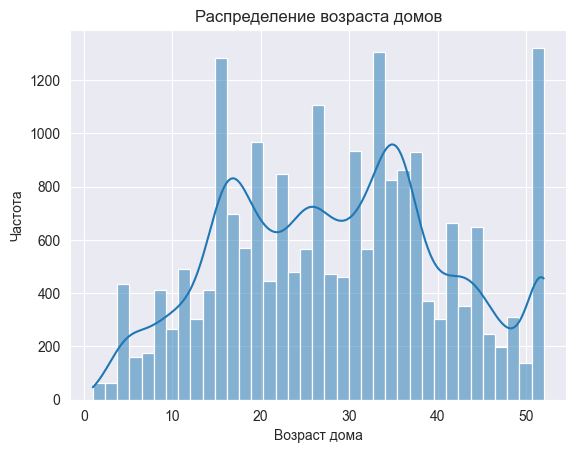

In [10]:
sns.histplot(df['HouseAge'], kde=True)  
plt.title('Распределение возраста домов')
plt.xlabel('Возраст дома')
plt.ylabel('Частота')
plt.show()

In [14]:
import numpy as np
median_h = np.median(df['HouseAge'])
mean_h = np.mean(df['HouseAge'])
diff_ha = abs(median_h - mean_h)/5
diff_ha

0.07210271317829467

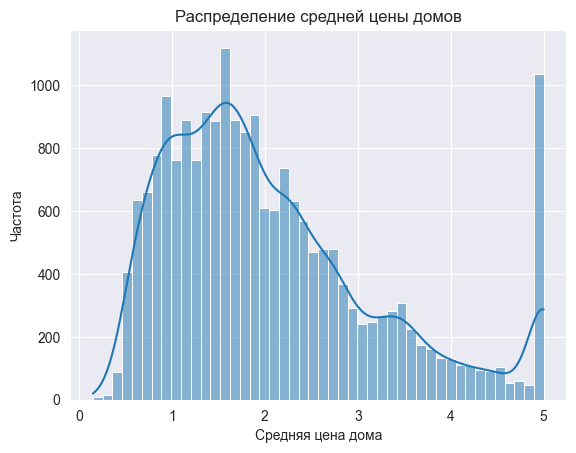

In [15]:
sns.histplot(target, kde=True)  
plt.title('Распределение средней цены домов')
plt.xlabel('Средняя цена дома')
plt.ylabel('Частота')
plt.show()

In [18]:
q_25, q_75 = np.quantile(target, q=[0.25, 0.75])
q_75 - q_25

1.4512499999999997

In [22]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


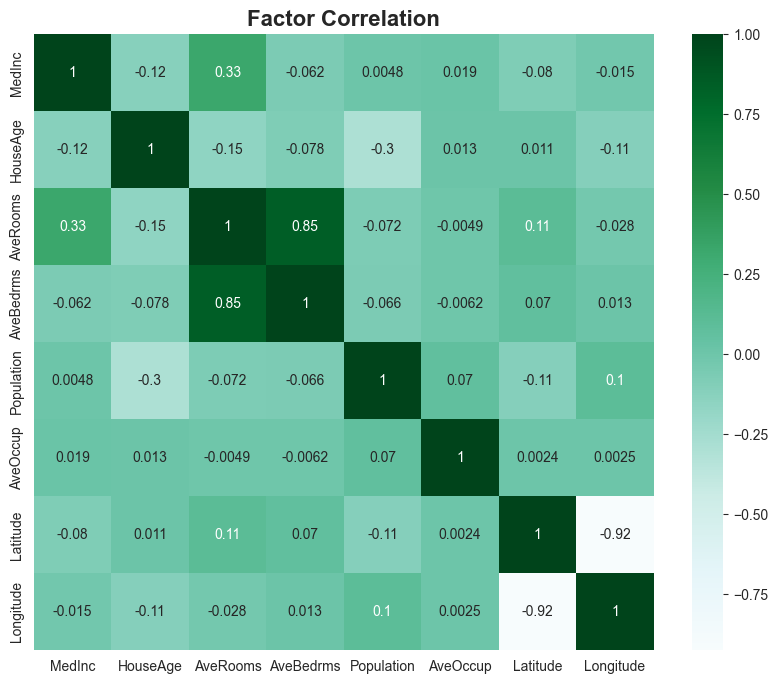

In [23]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = 'BuGn', annot = True)
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)
plt.show()

In [41]:
correlation_with_target = df.corrwith(target)

print(correlation_with_target)

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64


In [26]:
import scipy.stats

standardized_data = scipy.stats.zscore(df)


In [27]:
correlation_with_target = standardized_data.corrwith(target)

print(correlation_with_target)

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64


In [30]:
correlation_with_target = df.corrwith(target, method='spearman')

print(correlation_with_target)

MedInc        0.676778
HouseAge      0.074855
AveRooms      0.263367
AveBedrms    -0.125187
Population    0.003839
AveOccup     -0.256594
Latitude     -0.165739
Longitude    -0.069667
dtype: float64


In [29]:
correlation_with_target = standardized_data.corrwith(target, method='spearman')

print(correlation_with_target)

MedInc        0.676778
HouseAge      0.074855
AveRooms      0.263367
AveBedrms    -0.125187
Population    0.003839
AveOccup     -0.256594
Latitude     -0.165739
Longitude    -0.069667
dtype: float64


In [35]:
correlation_with_target = df.corrwith(target, method='kendall')

print(correlation_with_target)

MedInc        0.495528
HouseAge      0.049822
AveRooms      0.179175
AveBedrms    -0.083489
Population    0.002172
AveOccup     -0.174370
Latitude     -0.109411
Longitude    -0.052495
dtype: float64


In [36]:
correlation_with_target = standardized_data.corrwith(target, method='kendall')

print(correlation_with_target)

MedInc        0.495528
HouseAge      0.049822
AveRooms      0.179175
AveBedrms    -0.083489
Population    0.002172
AveOccup     -0.174370
Latitude     -0.109411
Longitude    -0.052495
dtype: float64


In [33]:
df['AveRooms'].corrwith(target, method='pearson')
df['AveRooms'].corrwith(target, method='spearman')
df['AveRooms'].corrwith(target)

AttributeError: 'Series' object has no attribute 'corrwith'

In [39]:
import scipy.stats

pearson_corr = df['AveRooms'].corr(target)
spearman_corr = scipy.stats.spearmanr(df['AveRooms'], target).correlation
kendall_corr = scipy.stats.kendalltau(df['AveRooms'], target).correlation

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)
print("Spearman correlation:", kendall_corr)


Pearson correlation: 0.15194828974145785
Spearman correlation: 0.26336668772954447
Spearman correlation: 0.17917481650845044


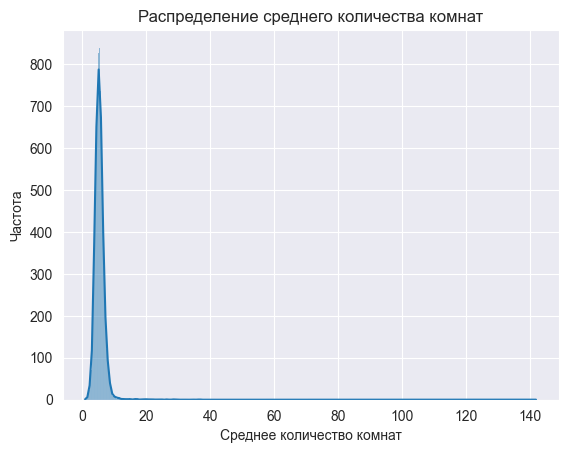

In [40]:
sns.histplot(df['AveRooms'], kde=True)
plt.title("Распределение среднего количества комнат")
plt.xlabel("Среднее количество комнат")
plt.ylabel("Частота")
plt.show()

In [43]:
q_25, q_75 = np.quantile(df["AveRooms"], q=[0.25, 0.75])
q_25, q_75

(4.440716235896959, 6.052380952380952)

In [44]:
df_filtered = df[(df["AveRooms"] >= q_25) & (df["AveRooms"] <= q_75)]

In [52]:
import pandas as pd

df_wt = pd.concat([df, target], axis=1)

In [53]:
df_filtered1 = df_wt[(df_wt["AveRooms"] >= q_25) & (df_wt["AveRooms"] <= q_75)]

In [61]:
pearson_corr = df_filtered1['AveRooms'].corr(df_filtered1['MedHouseVal'])
spearman_corr = scipy.stats.spearmanr(df_filtered1['AveRooms'], df_filtered1['MedHouseVal']).correlation
kendall_corr = scipy.stats.kendalltau(df_filtered1['AveRooms'], df_filtered1['MedHouseVal']).correlation

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)
print("kendall correlation:", kendall_corr)

Pearson correlation: 0.09818116336061132
Spearman correlation: 0.10498822705971243
kendall correlation: 0.07047159612719349


In [62]:
import scipy.stats

pearson_corr = df['AveRooms'].corr(target)
spearman_corr = scipy.stats.spearmanr(df['AveRooms'], target).correlation
kendall_corr = scipy.stats.kendalltau(df['AveRooms'], target).correlation

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)
print("Spearman correlation:", kendall_corr)


Pearson correlation: 0.15194828974145785
Spearman correlation: 0.26336668772954447
Spearman correlation: 0.17917481650845044


In [66]:
import numpy as np

# Calculate quantiles
q_025, q_975 = np.quantile(df['AveRooms'], [0.025, 0.975])

# Remove outliers
df_filtered = df[(df['AveRooms'] > q_025) & (df['AveRooms'] < q_975)]
target_filtered = target[df_filtered.index]

# Recalculate correlations
pearson_corr_filtered = df_filtered['AveRooms'].corr(target_filtered)
spearman_corr_filtered = scipy.stats.spearmanr(df_filtered['AveRooms'], target_filtered).correlation
kendall_corr_filtered = scipy.stats.kendalltau(df_filtered['AveRooms'], target_filtered).correlation

# Output changes
print("Changes in correlation coefficients after removing outliers:")
print("Change in Pearson correlation coefficient:", pearson_corr_filtered - pearson_corr)
print("Change in Spearman correlation coefficient:", spearman_corr_filtered - spearman_corr)
print("Change in Kendall correlation coefficient:", kendall_corr_filtered - kendall_corr)


Changes in correlation coefficients after removing outliers:
Change in Pearson correlation coefficient: 0.17581075670791496
Change in Spearman correlation coefficient: 0.011426777962952106
Change in Kendall correlation coefficient: 0.007103867191815161


In [70]:
pearson_corr = df['AveRooms'].corr(target)
spearman_corr = scipy.stats.spearmanr(df['AveRooms'], target).correlation
kendall_corr = scipy.stats.kendalltau(df['AveRooms'], target).correlation
pearson_corr, spearman_corr, kendall_corr

(0.15194828974145785, 0.26336668772954447, 0.17917481650845044)

In [71]:
pearson_corr_filtered = df_filtered['AveRooms'].corr(target_filtered)
spearman_corr_filtered = scipy.stats.spearmanr(df_filtered['AveRooms'], target_filtered).correlation
kendall_corr_filtered = scipy.stats.kendalltau(df_filtered['AveRooms'], target_filtered).correlation
pearson_corr_filtered, spearman_corr_filtered, kendall_corr_filtered

(0.3277590464493728, 0.2747934656924966, 0.1862786837002656)

In [69]:
# Пересчитываем корреляцию до удаления выбросов
pearson_corr = df['AveRooms'].corr(target)
spearman_corr = scipy.stats.spearmanr(df['AveRooms'], target).correlation
kendall_corr = scipy.stats.kendalltau(df['AveRooms'], target).correlation

# Пересчитываем корреляцию после удаления выбросов
pearson_corr_filtered = df_filtered['AveRooms'].corr(target_filtered)
spearman_corr_filtered = scipy.stats.spearmanr(df_filtered['AveRooms'], target_filtered).correlation
kendall_corr_filtered = scipy.stats.kendalltau(df_filtered['AveRooms'], target_filtered).correlation

# Считаем изменения
delta_pearson = pearson_corr_filtered - pearson_corr
delta_spearman = spearman_corr_filtered - spearman_corr
delta_kendall = kendall_corr_filtered - kendall_corr

# Определяем, какой из коэффициентов корреляции больше всех неустойчив к выбросам
most_unstable = max(delta_pearson, delta_spearman, delta_kendall)

if most_unstable == delta_pearson:
    print("Коэффициент Пирсона наиболее неустойчив к выбросам.")
elif most_unstable == delta_spearman:
    print("Коэффициент Спирмена наиболее неустойчив к выбросам.")
else:
    print("Коэффициент Кендалла наиболее неустойчив к выбросам.")


Коэффициент Пирсона наиболее неустойчив к выбросам.
